Lab Objective: Many data sets contain categorical values that naturally sort the data into groups.
Analyzing and comparing such groups is an important part of data analysis. In this lab we explore
pandas tools for grouping data and presenting tabular data more compactly, primarily through grouby
and pivot tables.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
iris = data('iris')

# Q1.

The setosa is the easiest to distinguish because its petals are so distinct


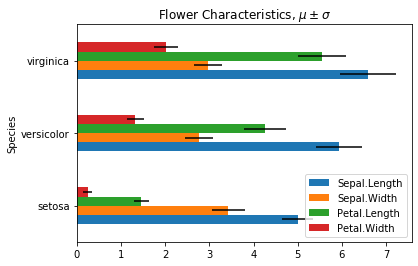

In [12]:
species = iris.groupby('Species')

species[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']].mean().plot(kind="barh",
                xerr=species.std(), title=r"Flower Characteristics, $\mu\pm\sigma$")

print('The setosa is the easiest to distinguish because its petals are so distinct')

Poison 3 is the most deadly
Treatment B is the most effective
For poison 1, pick B.
For poison 2 pick B. 
For poison 3 pick B.


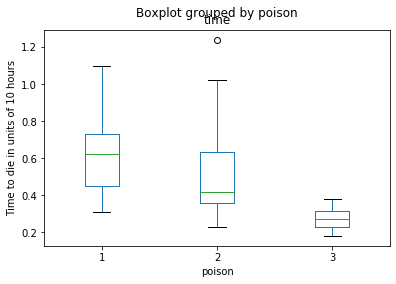

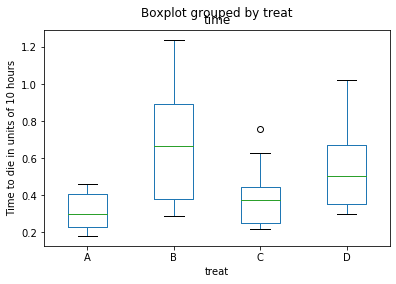

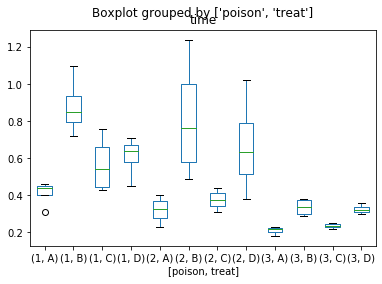

In [13]:
poisons = data('poisons')

poisons.boxplot(['time'], by='poison', grid=False)
plt.ylabel("Time to die in units of 10 hours")
print('Poison 3 is the most deadly')

poisons.boxplot(['time'], by='treat', grid=False)
plt.ylabel("Time to die in units of 10 hours")
print('Treatment B is the most effective')

sub = poisons.groupby(['poison', 'treat'])
poisons.boxplot(['time'], by=['poison', 'treat'], grid=False)
print('For poison 1, pick B.\nFor poison 2 pick B. \nFor poison 3 pick B.')

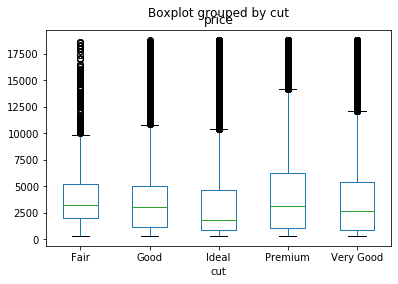

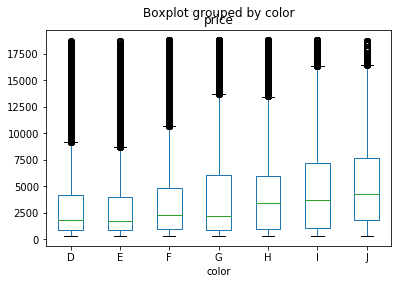

In [14]:
diamonds = data('diamonds')
diamonds.boxplot(['price'], by='cut', grid=False)
diamonds.boxplot(['price'], by='color', grid=False)

In [15]:
h = diamonds[diamonds['color']=='H']

cuts = h.groupby('cut')

ideal = cuts.get_group('Ideal')
fair = cuts.get_group('Fair')

print('mean depth of ideal is:', ideal['depth'].mean())
print('mean depth of fair is:',fair['depth'].mean())
print('this may explain the price discrepancy')

mean depth of ideal is: 61.73319422150879
mean depth of fair is: 64.58514851485147
this may explain the price discrepancy


# Q2.

In [16]:
titanic = pd.read_csv('titanic.csv')

titanic.pivot_table(index='Embarked', values='Survived')

,Survived
Embarked,
C,0.555556
Q,0.357724
S,0.332604


In [17]:
print('It seems as though sex is actually what predicts survival rate. Some embarkment points had more females')
titanic.pivot_table(index=['Embarked'], values='Survived', columns='Sex')


It seems as though sex is actually what predicts survival rate. Some embarkment points had more females


Sex,female,male
Embarked,,
C,0.902655,0.305732
Q,0.616667,0.111111
S,0.680412,0.170144


In [18]:
titanic.pivot_table(index=['Embarked','Pclass'], values='Survived', columns='Sex')


Sex                female      male
Embarked Pclass                    
C        1.0     0.971831  0.400000
         2.0     1.000000  0.294118
         3.0     0.709677  0.214286
Q        1.0     1.000000  0.000000
         2.0     1.000000  0.000000
         3.0     0.589286  0.122807
S        1.0     0.956522  0.305556
         2.0     0.870968  0.134228
         3.0     0.395349  0.144809